**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*

*modified by Eve Marenghi November 2018*


In [60]:
# import packages
from __future__ import print_function, division
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np 

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
# from FBB
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

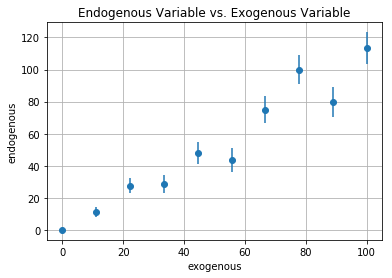

Figure 1: The figure above plots endogenous variable vs. exogenous variable with uncertainties as error bars. From the error bars, we see that the uncertainty increases as the exogenous variable increases because uncertainty is calculated as the square root of the exogenous variable.


In [76]:
# set a random seed for reproducibility 
np.random.seed(1964)

# create exogenous variable
x = np.linspace(0, 100, num=10)

# plot the line with uncertainties as error bars 
plt.figure()
plt.errorbar(x, line(1, x, 0, errors), errors(x), fmt='o')
plt.grid()
plt.title("Endogenous Variable vs. Exogenous Variable")
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.show()
print("Figure 1: The figure above plots endogenous variable vs. exogenous " +
      "variable with uncertainties as error bars. From the error bars, we " +
      "see that the uncertainty increases as the exogenous variable increases " +
      "because uncertainty is calculated as the square root of the exogenous variable.")

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [77]:
# print y 
y = line(1, x, 0, errors)
print(y)

[   0.            9.57090534   26.69119921   33.91389427   39.802192
   55.18819707   68.14282479   78.2815902   103.25871626   93.5777113 ]


In [78]:
# print x 
print(x)

[   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]


In [79]:
# apply statsmodels.api.add_constant() to x and print result 
x_const = sm.add_constant(x)
print(x_const)

[[   1.            0.        ]
 [   1.           11.11111111]
 [   1.           22.22222222]
 [   1.           33.33333333]
 [   1.           44.44444444]
 [   1.           55.55555556]
 [   1.           66.66666667]
 [   1.           77.77777778]
 [   1.           88.88888889]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [80]:
#THE WRONG WAY
smfit_x = smf.OLS(y, x).fit()
smfit_x.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.94e-11
Time:                        13:32:48   Log-Likelihood:                -30.897
No. Observations:                  10   AIC:                             63.79
Df Residuals:                       9   BIC:                             64.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0184      0.030     34.089      0.000         0.951     1.086
==============================================================================
Omnibus:                        6.098   Durbin-Watson:                   2.587
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                2.064
Skew:                           0.973   Prob(JB):                        0.356
Kurtosis:                       4.080   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#THE RIGHT WAY
smfit_xconst = smf.OLS(y, x_const).fit()
smfit_xconst.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     301.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.23e-07
Time:                        13:32:54   Log-Likelihood:                -30.893
No. Observations:                  10   AIC:                             65.79
Df Residuals:                       8   BIC:                             66.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2674      3.492     -0.077      0.941        -8.320     7.786
x1             1.0222      0.059     17.363      0.000         0.886     1.158
==============================================================================
Omnibus:                        5.502   Durbin-Watson:                   2.591
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                1.772
Skew:                           0.905   Prob(JB):                        0.412
Kurtosis:                       3.987   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment**: The first model summary result above uses x as the exogenous variable. The second model summary result above uses x_const as the exogenous variable. x_const is the exogenous variable x with a constant term added. I added the constant term in order to fit the intercept of the linear model. In the summary results for the regression with x as the exogenous variable, there is no 'const' coefficient. In the summary results for the regression with x_const as the exogenous variable, there is a 'const' coefficient. Both regression lines fit the data well, with R-squared values close to 1.

# 4. plot the data (as points) and both statsmodels fits

In [82]:
# assign parameters for line plotting 
beta0_xconst, beta1_xconst = smfit_xconst.params
beta1_x = smfit_x.params

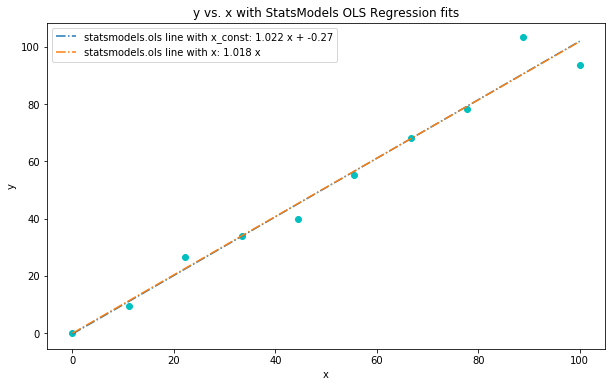

y vs. x points plotted with results of OLS regression using x as the exogenous variable (orange) and using x_const as the exogenous variable (blue). The regression lines are almost identical. The slopes are nearly identical and the y intercept for the line fitted with x_const is -0.27, which is close to 0. Visually, it appears that the regression lines fit the data well, which makes sense because the R-squared values were close to 1 in both regression summary results.


In [85]:
# plot points and OLS regression lines 
fig = plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', c='c')
pl.plot(x, x * beta1_xconst + beta0_xconst, '-.',
        label="statsmodels.ols line with x_const: %.3f x + %.2f"\
       %(beta1_xconst, beta0_xconst))
pl.plot(x, x * beta1_x, '-.',
        label="statsmodels.ols line with x: %.3f x"\
       %(beta1_x))
pl.xlabel('x')
pl.ylabel('y')
pl.title('y vs. x with StatsModels OLS Regression fits')
pl.legend(loc=2)
pl.show()
print ("y vs. x points plotted with results of OLS regression using x as the exogenous " + 
       "variable (orange) and using x_const as the exogenous variable (blue). The " +
       "regression lines are almost identical. The slopes are nearly identical and the " +
       "y intercept for the line fitted with x_const is -0.27, which is close to 0. " + 
       "Visually, it appears that the regression lines fit the data well, which makes " + 
       "sense because the R-squared values were close to 1 in both regression summary results.")

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

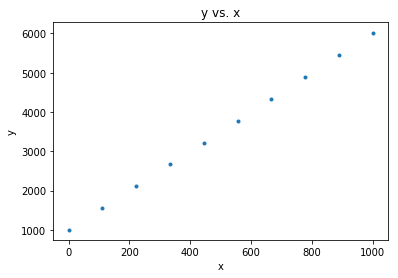

Plot of y vs. x with uncertainties as error bars. The uncertainties are calculated as sqrt(x), which makes them difficult to see because they are small in comparison to the scale of the values on the y axis.


In [125]:
# create a line 
x = np.linspace(0, 1000, num=10)
y = 5 * x + 1000

# plot the line with uncertainties as error bars 
plt.figure()
plt.errorbar(x, y, yerr=np.sqrt(x), fmt='.')
plt.title("y vs. x")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('Plot of y vs. x with uncertainties as error bars. The uncertainties are calculated ' +
     'as sqrt(x), which makes them difficult to see because they are small in comparison ' +
     'to the scale of the values on the y axis.')

# 6. repeat step 3

In [89]:
# fit ols regression with x 
smfitx = smf.OLS(y, x).fit()
smfitx.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     451.0
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.34e-09
Time:                        13:38:08   Log-Likelihood:                -77.068
No. Observations:                  10   AIC:                             156.1
Df Residuals:                       9   BIC:                             156.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             6.4211      0.302     21.237      0.000         5.737     7.105
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.624
Skew:                          -0.000   Prob(JB):                        0.732
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# fit ols regression, adding constant term to x
X = sm.add_constant(x)
smfitX = smf.OLS(y, X).fit()
smfitX.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.359e+30
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          1.46e-121
Time:                        13:38:28   Log-Likelihood:                 258.23
No. Observations:                  10   AIC:                            -512.5
Df Residuals:                       8   BIC:                            -511.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1000.0000   9.69e-13   1.03e+15      0.000      1000.000  1000.000
x1             5.0000   1.63e-15   3.06e+15      0.000         5.000     5.000
==============================================================================
Omnibus:                        1.009   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.733
Skew:                          -0.346   Prob(JB):                        0.693
Kurtosis:                       1.868   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comment**: Again we see that when we run the regression with the exogenous variable with a constant term added, the regression summary results show a 'const' coefficient which is not included when we fit the model with the exogenous variable x without a constant added. When we add the constant term to the exogenous variable, the model improves to fit the data perfectly. In the second set of regression summary results, R-squared=1, the y intercept=100, and slope=5 which are the values I chose for my line.

In [92]:
# assign parameters for line plotting 
beta0X, beta1X = smfitX.params
beta1x = smfitx.params

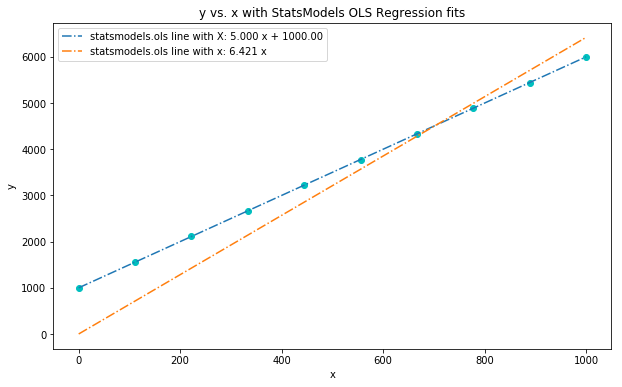

y vs. x points plotted with results of OLS regression using x as the exogenous variable (orange) and using X as the exogenous variable (blue). The regression line that is fitted using X (x with constant terms added) fits the data better than the regression line that is fitted using x (x without constant terms added). This is because the line fitted with X fits the intercept of the linear model while the line fitted with x does not. 


In [94]:
fig = plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', c='c')
pl.plot(x, x * beta1X + beta0X, '-.',
        label="statsmodels.ols line with X: %.3f x + %.2f"\
       %(beta1X, beta0X))
pl.plot(x, x * beta1x, '-.',
        label="statsmodels.ols line with x: %.3f x"\
       %(beta1x))
pl.xlabel('x')
pl.ylabel('y')
pl.title('y vs. x with StatsModels OLS Regression fits')
pl.legend(loc=2)
pl.show()
print ("y vs. x points plotted with results of OLS regression using x as the exogenous " + 
       "variable (orange) and using X as the exogenous variable (blue). The " +
       "regression line that is fitted using X (x with constant terms added) fits " +
       "the data better than the regression line that is fitted using x (x without " +
       "constant terms added). This is because the line fitted with X fits the intercept " + 
       "of the linear model while the line fitted with x does not. ")

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [117]:
# weights = inverse of the variance, in this case the error term which is sqrt(x) 
wls_fitx = sm.WLS(y, x, W=1.0/np.sqrt(x)).fit()
wls_fitx.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            WLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     451.0
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.34e-09
Time:                        13:55:53   Log-Likelihood:                -77.068
No. Observations:                  10   AIC:                             156.1
Df Residuals:                       9   BIC:                             156.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             6.4211      0.302     21.237      0.000         5.737     7.105
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.624
Skew:                          -0.000   Prob(JB):                        0.732
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# weights = inverse of the variance, in this case the error term which is sqrt(x) 
wls_fitX = sm.WLS(y, X, W=1.0/np.sqrt(x)).fit()
wls_fitX.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.359e+30
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          1.46e-121
Time:                        13:55:58   Log-Likelihood:                 258.23
No. Observations:                  10   AIC:                            -512.5
Df Residuals:                       8   BIC:                            -511.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1000.0000   9.69e-13   1.03e+15      0.000      1000.000  1000.000
x1             5.0000   1.63e-15   3.06e+15      0.000         5.000     5.000
==============================================================================
Omnibus:                        1.009   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.604   Jarque-Bera (JB):                0.733
Skew:                          -0.346   Prob(JB):                        0.693
Kurtosis:                       1.868   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

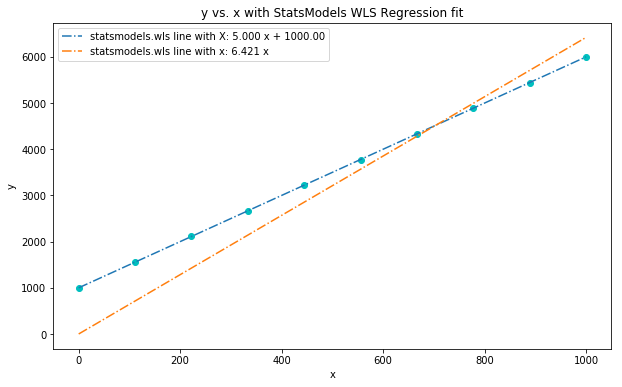

y vs. x points plotted with results of WLS regression using x as the exogenous variable (orange) and using X as the exogenous variable (blue). As we saw with the OLS regression results, the regression line that is fitted using X (x with constant terms added) fits the data better than the regression line that is fitted using x (x without constant terms added). This is because the line fitted with X fits the intercept of the linear model while the line fitted with x does not. 


In [121]:
# plot
beta0_wlsX, beta1_wlsX = wls_fitX.params
beta1_wlsx = wls_fitx.params

fig = plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', c='c')
pl.plot(x, x * beta1_wlsX + beta0_wlsX, '-.',
        label="statsmodels.wls line with X: %.3f x + %.2f"\
       %(beta1_wlsX, beta0_wlsX))
pl.plot(x, x * beta1_wlsx, '-.',
        label="statsmodels.wls line with x: %.3f x"\
       %(beta1_wlsx))
pl.xlabel('x')
pl.ylabel('y')
pl.title('y vs. x with StatsModels WLS Regression fit')
pl.legend(loc=2)
pl.show()
print ("y vs. x points plotted with results of WLS regression using x as the exogenous " + 
       "variable (orange) and using X as the exogenous variable (blue). As we saw with the " +
       "OLS regression results, the regression line that is fitted using X (x with constant " +
       "terms added) fits the data better than the regression line that is fitted using x " +
       "(x without constant terms added). This is because the line fitted with X fits the intercept " + 
       "of the linear model while the line fitted with x does not. ")

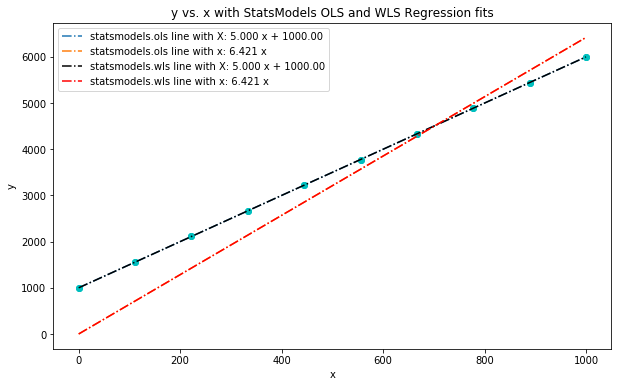

y vs. x with results from OLS and WLS regression on the same plot. I do not see a difference between the OLS and WLS regression lines. Both regressions returned the same results.


In [124]:
# plot OLS and WLS models together 
fig = plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', c='c')
pl.plot(x, x * beta1X + beta0X, '-.',
        label="statsmodels.ols line with X: %.3f x + %.2f"\
       %(beta1X, beta0X))
pl.plot(x, x * beta1x, '-.',
        label="statsmodels.ols line with x: %.3f x"\
       %(beta1x))
plt.plot(x, y, 'bo', c='c')
pl.plot(x, x * beta1_wlsX + beta0_wlsX, '-.', c='k',
        label="statsmodels.wls line with X: %.3f x + %.2f"\
       %(beta1_wlsX, beta0_wlsX))
pl.plot(x, x * beta1_wlsx, '-.', c='r',
        label="statsmodels.wls line with x: %.3f x"\
       %(beta1_wlsx))
pl.xlabel('x')
pl.ylabel('y')
pl.title('y vs. x with StatsModels OLS and WLS Regression fits')
pl.legend(loc=2)
pl.show()
print("y vs. x with results from OLS and WLS regression on the same plot. I do not see a difference " +
     "between the OLS and WLS regression lines. Both regressions returned the same results.")

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

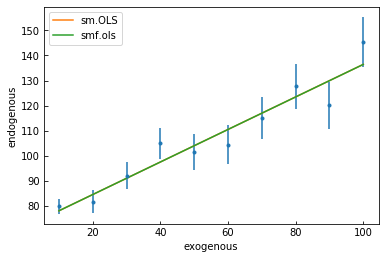

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();